## Bibliotecas

In [1]:
import librosa 
import numpy as np
from math import pi,sin,cos
import scipy
from matplotlib import pyplot as plt
import librosa.display 
import pandas as pd
import os
from spectrogram import to_wav

## Fingerprinting e Relacionados

In [2]:
def fingerprint(samples, sampling_rate,  channels=2, max_length=0)->np.ndarray:
    
    samples_per_window = int(sampling_rate*0.037) # Quantas samples por window 
    num_timeframes = int(max_length/samples_per_window) # Descobre quantos frames 
    num_bands = 25 # 25 bandas, segundo o artigo
    
    fngrprnt = np.empty([channels,num_timeframes-1,num_bands-1],dtype=int) #Declarando o fingerprint
    for k,ch in enumerate(samples):
        
        add_zero = num_timeframes - (max_length % num_timeframes) #Calculando quantos zeros serão 
                                                                  # necessários para um split exato

        ch = np.append(ch,np.zeros(add_zero)) #Adicionando os zeros necessários
        
        windows = np.split(ch,num_timeframes) #Dividindo a track em frames
    
        fft_windows = np.empty(np.shape(windows), dtype=complex) #Criando array que receberá as transformadas
        
        for i,window in enumerate(windows):
            fft_windows[i] = scipy.fft.fft(window) #Montando os frames transformados
           

        len_frame = int(len(ch)/num_timeframes)
        add_bands_zero = num_bands - (len_frame % num_bands)#Calculando quantos zeros serão 
                                                            # necessários para um split exato
        timeframe_bands = np.empty([num_timeframes,num_bands]) #Criando array que receberá as transformadas
        for j,fft_window in enumerate(fft_windows):
            aux = np.split(np.append(fft_window,np.zeros(add_bands_zero,dtype=complex)),num_bands) # Adicionando os zeros 
                                                                                     #necessários e splitando
            timeframe_bands[j] = average(aux) #Tirando a média de cada banda de energia e montando o array 
        
        ch_fngrprnt = treat(timeframe_bands) # Gerando o fingerprint em si a partir das bandas

        fngrprnt[k] = ch_fngrprnt #Montando o fingerprint do canal k 
    
    return fngrprnt        

In [3]:
def treat(timeframe_bands)->np.ndarray:
    bands = len(timeframe_bands[0]) -1#24
    ch_fprint = np.empty([len(timeframe_bands),bands],dtype=int)
    bands_frame_anterior = np.zeros(bands)
    aux = np.empty(bands)
    for j,frame in enumerate(timeframe_bands):
        
        for i in range(len(frame)-1):
            aux[i] = frame[i] - frame[i+1]
            
            if(aux[i]>bands_frame_anterior[i]):
                ch_fprint[j][i] = 1
            else: 
                ch_fprint[j][i] = -1
            bands_frame_anterior[i] = aux[i]
    
    
     
    return ch_fprint[1:]

In [4]:
def average(array_freq):
    soma = 0.
    aux = np.empty([len(array_freq),])
    for j,ary in enumerate(array_freq):
        for i in ary:
            soma += abs(i)**2 #Energia em nessa frequencia
        aux[j] = soma

    return aux

## Criar database

In [17]:
def create_database():
    data = {
            "Fingerprint": [],
            "Name" : []
        }
    
    mp3s = os.listdir("mp3") # Lista o nome dos arquivos dentro da pasta mp3
    count = 0
    #mp3s = os.listdir("wav")
    for name in mp3s:
        mp3_path = "mp3/" + name
        wav_path = to_wav(mp3_path, name[:-4])
        sample, sample_rate = librosa.load(wav_path, sr=None) #Carrega o arquivo
        fing = fingerprint([sample],sample_rate,1,len(sample))
        print(np.shape(fing))
        data["Fingerprint"].append(fing[0].tolist())
        data["Name"].append(name[:-4])
        os.remove(wav_path)
    
    df = pd.DataFrame.from_dict(data)
    df.to_csv("Fingerprint_database.csv", index=False)

In [18]:
# create_database()
df = pd.read_csv("Fingerprint_database.csv")
df
df.describe()

(1, 5547, 24)
(1, 7409, 24)
(1, 4446, 24)
(1, 6742, 24)
(1, 9041, 24)
(1, 7683, 24)
(1, 7214, 24)
(1, 8162, 24)
(1, 5586, 24)
(1, 7973, 24)
(1, 4344, 24)
(1, 6548, 24)
(1, 4876, 24)
(1, 6042, 24)
(1, 5427, 24)
(1, 6731, 24)
(1, 4944, 24)
(1, 7529, 24)
(1, 6836, 24)
(1, 6644, 24)
(1, 5795, 24)
(1, 7349, 24)
(1, 5683, 24)
(1, 4917, 24)
(1, 7439, 24)
(1, 5723, 24)
(1, 6867, 24)
(1, 2685, 24)
(1, 6462, 24)
(1, 5189, 24)


,Fingerprint,Name
count,30,30
unique,30,30
top,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...",One_For_the_Road
freq,1,1


## Execução

AttributeError: 'str' object has no attribute 'T'

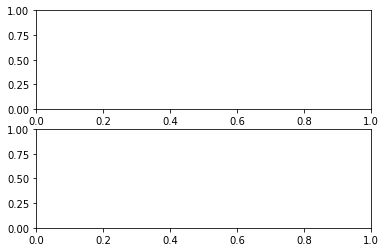

In [7]:

df = pd.read_csv("Fingerprint_database.csv")
fing = df["Fingerprint"].iloc(0)

plotar = fing[0]
fig, (ax,spec) = plt.subplots(2,1)
im = ax.imshow(plotar.T)

# Show ticks
(x,y)=np.shape(plotar)
ax.set_xticks(np.arange(0,x,step=100))
ax.set_yticks(np.arange(0,y,step=12))


plt.show()
fig.savefig(nome + ".png", format="png")
